# Objective

The chapter mainly addresses custom based complex visualisations using matploblib. First we revisit the technique by which we plot using pandas and after we would focus on matplotlib to plot custom visualisations.

In [1]:
import pandas as pd

# About Dataset

The data that is being used here in this chapter is imports and export data of Indian trade from the year 2010 to 2019. Consists of name of the commodity, value of trade, name of the country and the year of trade.

In [2]:
#import in trade means bringing some commodity to the place/country from some country and then is sold in the respective place
imports=pd.read_csv('2018-2010_import.csv')
imports.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [3]:
#export in trade means selling some commodity to other country for sale 
exports=pd.read_csv('2018-2010_export.csv')
exports.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


# Analysing Import Data

In [4]:
#checking the shape
imports.shape

(76124, 5)

In [5]:
#checking nulls
imports.isnull().sum()

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

In [6]:
#checking the country against which the max null values belong
imports[imports.value.isnull()].country.value_counts()[:10].plot(kind='bar').grid()

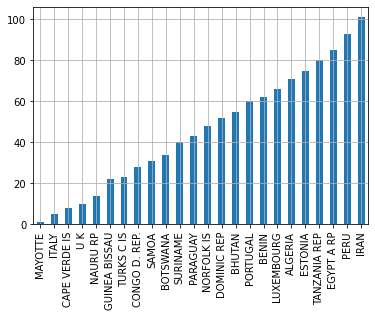

In [7]:
#checking the country against which the min null values belong
imports[imports.value.isnull()].country.value_counts()[::-10].plot(kind='bar').grid()

In [8]:
#dropping nulls
imports=imports.dropna()
imports.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [9]:
#grouping by on country and year
year_wise_imports=imports.groupby(['country','year']).agg({'value':'sum'})
year_wise_imports.head(15)

value
country         year        
AFGHANISTAN TIS 2010  146.01
                2011  132.49
                2012  159.53
                2013  208.76
                2014  261.92
                2015  615.80
                2016  292.90
                2017  433.77
                2018  435.44
ALBANIA         2010    0.11
                2011  141.13
                2012   31.05
                2013  198.79
                2014   50.77
                2015   34.36

In [10]:
year_wise_imports=year_wise_imports.reset_index()
year_wise_imports.head(10)

,country,year,value
0,AFGHANISTAN TIS,2010,146.01
1,AFGHANISTAN TIS,2011,132.49
2,AFGHANISTAN TIS,2012,159.53
3,AFGHANISTAN TIS,2013,208.76
4,AFGHANISTAN TIS,2014,261.92
5,AFGHANISTAN TIS,2015,615.80
6,AFGHANISTAN TIS,2016,292.90
7,AFGHANISTAN TIS,2017,433.77
8,AFGHANISTAN TIS,2018,435.44
9,ALBANIA,2010,0.11


In [11]:
#finding unique countries
year_wise_imports.country.unique()

array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHILE', 'CHINA P RP', 'CHRISTMAS IS.', 'COCOS IS', 'COLOMBIA',
       'COMOROS', 'CONGO D. REP.', 'CONGO P REP', 'COOK IS', 'COSTA RICA',
       "COTE D' IVOIRE", 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
       'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FALKLAND IS', 'FAROE IS.', 'FIJI IS', 'FINLAND',
       'FR G

## Country wise comparison of Import trade

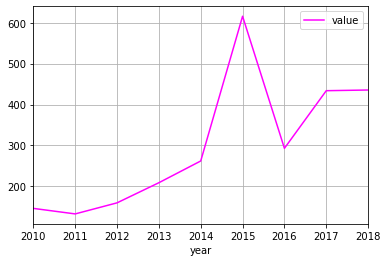

In [12]:
#year wise imports with AFGHANISTAN TIS
year_wise_imports[year_wise_imports.country=='AFGHANISTAN TIS'].plot(x='year',y='value',c='magenta').grid()

In [17]:
import matplotlib.pyplot as plt

afg=year_wise_imports[year_wise_imports.country=='AFGHANISTAN TIS']
afg.head()

,country,year,value
0,AFGHANISTAN TIS,2010,146.01
1,AFGHANISTAN TIS,2011,132.49
2,AFGHANISTAN TIS,2012,159.53
3,AFGHANISTAN TIS,2013,208.76
4,AFGHANISTAN TIS,2014,261.92


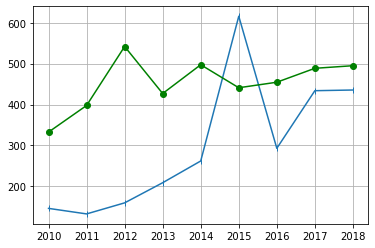

In [30]:
#line plot- comparison of imports for Pakistan and Afghanishtan over years

pak=year_wise_imports[year_wise_imports.country=='PAKISTAN IR']

plt.plot(afg.year,afg.value,marker='|')
plt.plot(pak.year,pak.value,color='green',marker='o')
plt.grid()

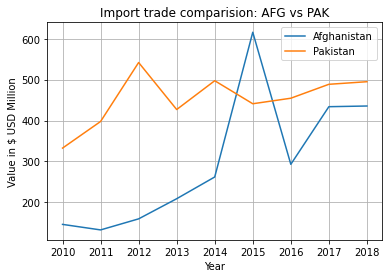

In [21]:
pak=year_wise_imports[year_wise_imports.country=='PAKISTAN IR']
plt.plot(afg.year,afg.value,label='Afghanistan')
plt.plot(pak.year,pak.value,label='Pakistan')
plt.title('Import trade comparision: AFG vs PAK')
plt.xlabel('Year')
plt.ylabel('Value in $ USD Million')
plt.legend()
plt.grid()

## Year-wise import data comparison

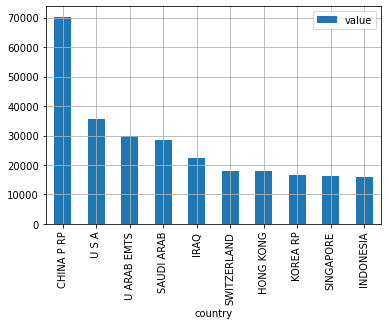

In [37]:
#bar plot- highest import trade in descending order
year_wise_imports[year_wise_imports.year==2018].sort_values(by='value',ascending=False)[:10].plot(x='country',y='value',kind='bar').grid()

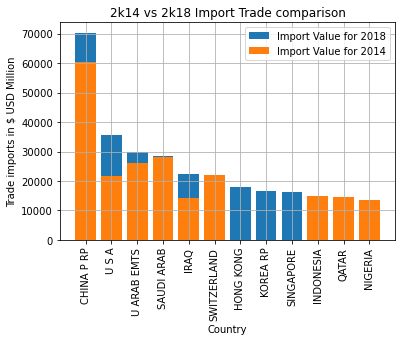

In [42]:
#comparing highest import trades for year 2014 and 2018

impdata_18=year_wise_imports[year_wise_imports.year==2018].sort_values(by='value',ascending=False)[:9]
impdata_14=year_wise_imports[year_wise_imports.year==2014].sort_values(by='value',ascending=False)[:9]

plt.bar(impdata_18.country,impdata_18.value,label='Import Value for 2018')
plt.bar(impdata_14.country,impdata_14.value,label='Import Value for 2014')
plt.legend()
plt.grid()
plt.title('2k14 vs 2k18 Import Trade comparison')
plt.xlabel('Country')
plt.ylabel('Trade imports in $ USD Million')
plt.xticks(rotation=90)
plt.show()

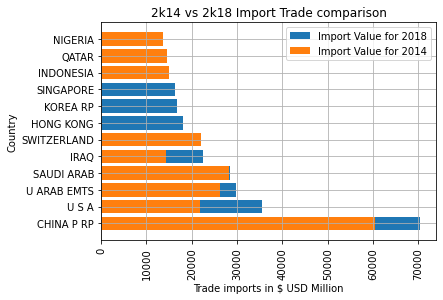

In [45]:
plt.barh(impdata_18.country,impdata_18.value,label='Import Value for 2018')
plt.barh(impdata_14.country,impdata_14.value,label='Import Value for 2014')
plt.legend()
plt.grid()
plt.title('2k14 vs 2k18 Import Trade comparison')
plt.ylabel('Country')
plt.xlabel('Trade imports in $ USD Million')
plt.xticks(rotation=90)
plt.show()

# Analysing Export Data

In [46]:
exports.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [48]:
exports.shape

(137023, 5)

In [47]:
exports.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [49]:
exports=exports.dropna()
exports.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [50]:
#grouping on the basis of country and year
year_wise_exports=exports.groupby(['country','year']).agg({'value':'sum'})
year_wise_exports.head(15)

value
country         year        
AFGHANISTAN TIS 2010  422.31
                2011  510.81
                2012  472.55
                2013  474.26
                2014  422.48
                2015  526.51
                2016  506.26
                2017  709.66
                2018  715.35
ALBANIA         2010   11.49
                2011   12.61
                2012   17.47
                2013   18.71
                2014   19.44
                2015   24.00

In [51]:
year_wise_exports=year_wise_exports.reset_index()
year_wise_exports.head(15)

,country,year,value
0,AFGHANISTAN TIS,2010,422.31
1,AFGHANISTAN TIS,2011,510.81
2,AFGHANISTAN TIS,2012,472.55
3,AFGHANISTAN TIS,2013,474.26
4,AFGHANISTAN TIS,2014,422.48
5,AFGHANISTAN TIS,2015,526.51
6,AFGHANISTAN TIS,2016,506.26
7,AFGHANISTAN TIS,2017,709.66
8,AFGHANISTAN TIS,2018,715.35
9,ALBANIA,2010,11.49


In [52]:
exp_2018=year_wise_exports[year_wise_exports.year==2018]
exp_2018.value.describe()

count      232.000000
mean      1422.666552
std       4520.689746
min          0.000000
25%         10.650000
50%        143.945000
75%        741.442500
max      52405.880000
Name: value, dtype: float64

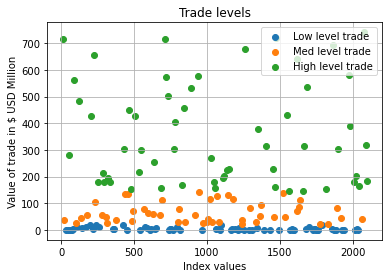

In [66]:
#scatter plot- plotting trade values with condition

low=exp_2018[exp_2018.value<20].value
med=exp_2018[(exp_2018.value>=20) & (exp_2018.value<144)].value
high=exp_2018[(exp_2018.value>=144) & (exp_2018.value<=742)].value

plt.scatter(low.index,low,label='Low level trade')
plt.scatter(med.index,med,label='Med level trade')
plt.scatter(high.index,high,label='High level trade')
plt.title('Trade levels')
plt.legend(loc='upper right')
plt.xlabel('Index values')
plt.ylabel('Value of trade in $ USD Million')
plt.grid()

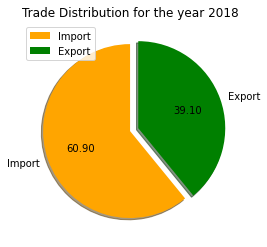

In [88]:
#to visualise the trade distribution for a specific year

imp18=imports[imports.year==2018].value.sum()
exp18=exports[exports.year==2018].value.sum()

trade=[imp18,exp18]
plt.pie(trade,explode=[0,0.1],labels=['Import','Export'],autopct='%.2f',colors=['orange','green'],shadow=True, startangle=90)
plt.title('Trade Distribution for the year 2018')
plt.legend()
plt.show()

In [122]:
#Year wise Trade Distribution
imps,exps=[],[]
years=[2010,2011,2012,2013,2014,2015]

for year in years:
    imps.append(imports[imports.year==year].value.sum())
    exps.append(exports[exports.year==year].value.sum())

print(imps)
print(exps)

[369762.25, 489311.81, 490730.07, 450192.99, 448026.63, 412537.53]
[249801.18, 305948.28, 300384.32, 314388.61, 310321.02, 262274.30000000005]


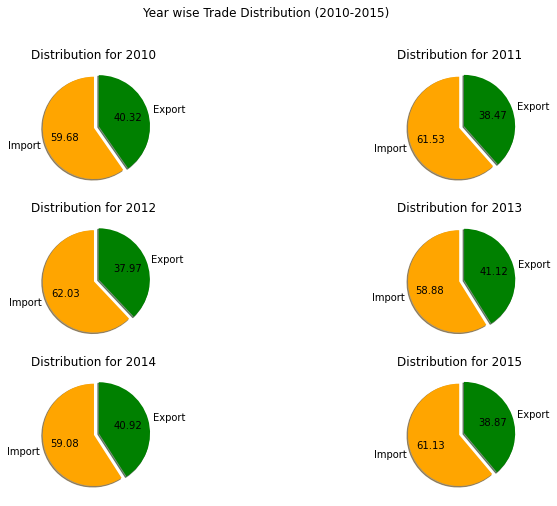

In [146]:
fig, ax = plt.subplots(3, 2,figsize=(12,8))
count=0
for i in ax:
    for j in i:
        j.set_title(f'Distribution for {years[count]}')
        j.pie([imps[count],exps[count]],explode=[0,0.1],labels=['Import','Export'],autopct='%.2f',colors=['orange','green'],shadow=True, startangle=90)
        count+=1
fig.suptitle('Year wise Trade Distribution (2010-2015)')
plt.show()